# **Load Dataset**

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Jwqic830h6wNM5xz43nFoN6es8yu2dEB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Jwqic830h6wNM5xz43nFoN6es8yu2dEB" -O gtsrb.zip && rm -rf /tmp/cookies.txt
!unzip -q /content/gtsrb.zip -d /content -p Train/*
!rm -rf /content/gtsrb.zip

--2021-06-04 01:09:00--  https://docs.google.com/uc?export=download&confirm=gXbx&id=1Jwqic830h6wNM5xz43nFoN6es8yu2dEB
Resolving docs.google.com (docs.google.com)... 74.125.195.100, 74.125.195.101, 74.125.195.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-0c-docs.googleusercontent.com/docs/securesc/d174q3dmu7ii3lf4ri875s91gkcrmnnk/hbivq7e6ls1dveit21tpvn36oo6o5nv6/1622768925000/02092330026956381580/03473300688902132383Z/1Jwqic830h6wNM5xz43nFoN6es8yu2dEB?e=download [following]
--2021-06-04 01:09:00--  https://doc-04-0c-docs.googleusercontent.com/docs/securesc/d174q3dmu7ii3lf4ri875s91gkcrmnnk/hbivq7e6ls1dveit21tpvn36oo6o5nv6/1622768925000/02092330026956381580/03473300688902132383Z/1Jwqic830h6wNM5xz43nFoN6es8yu2dEB?e=download
Resolving doc-04-0c-docs.googleusercontent.com (doc-04-0c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

# GTSRB - German Traffic Sign Recognition Benchmark
<img src="https://drive.google.com/uc?export=view&id=1KMIl956xFLHFl9fa-br0plBqNVRNwK_C">

[INI Benchmark Website](https://benchmark.ini.rub.de/).

# Import Packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout

# Store Data, labels in list

In [6]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [7]:
cur_path

'/content'

# Preprocess the images

In [8]:
for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + "/"+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [9]:
print("Total number of data is ", len(data))
print("Total number of label is ", len(labels))

Total number of data is  39209
Total number of label is  39209


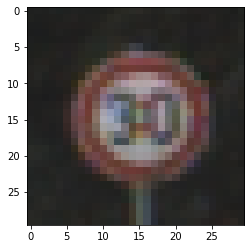

Label :  1


In [10]:
SAMPLE = 1000

plt.imshow(data[SAMPLE])
plt.show()
print("Label : ", labels[SAMPLE])

In [11]:
print("Shape of data is ", data[SAMPLE].shape)

Shape of data is  (30, 30, 3)


# Converting lists into numpy arrays

In [12]:
data = np.array(data)
labels = np.array(labels)

In [13]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


before the 'train_test_split'


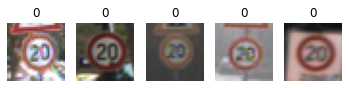



after the 'train_test_split'


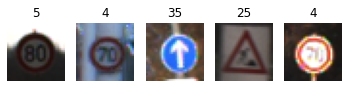

In [16]:
num_samples = 5

print("before the 'train_test_split'")
for i in range(num_samples) :
  plt.subplot(1, num_samples, i + 1)
  plt.imshow(data[i, :, :, :])
  plt.title(labels[i])
  plt.axis("off")
plt.show()

print("\n\n" + "after the 'train_test_split'")
for i in range(num_samples) :
  plt.subplot(1, num_samples, i + 1)
  plt.imshow(X_train[i, :, :, :])
  plt.title(y_train[i])
  plt.axis("off")
plt.show()

# Convert labels to onehot encoding
[One-hot from Wikipedia](https://en.wikipedia.org/wiki/One-hot)

In [17]:
print(y_train[0])

5


In [18]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [19]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Build Model
[Model API on Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              150995968 
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 43)               

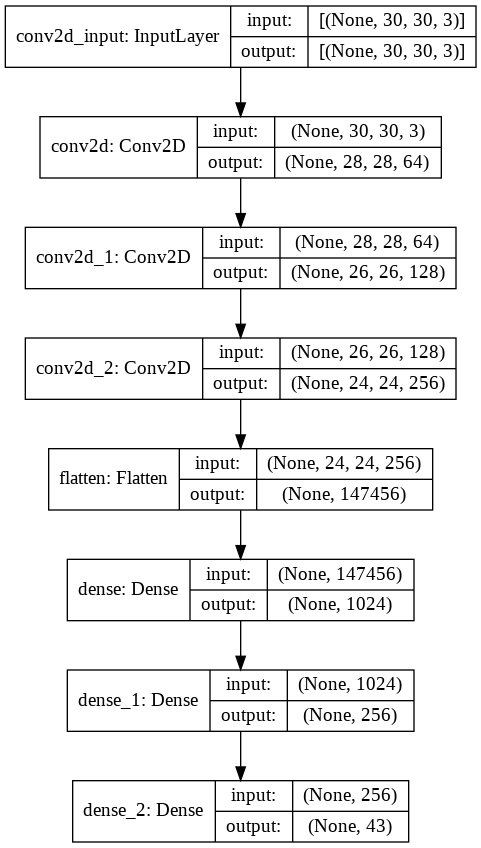

In [20]:
model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model1.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model1.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(43, activation="softmax"))

model1.summary()
plot_model(model1, "model1.png", show_shapes=True)

In [64]:
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
epoch = 5
history = model1.fit(X_train, y_train, batch_size=32, epochs=epoch, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
981/981 [==============================] - 97s 98ms/step - loss: 1.5823 - accuracy: 0.8141 - val_loss: 0.2317 - val_accuracy: 0.9427
Epoch 2/5
981/981 [==============================] - 95s 97ms/step - loss: 0.1874 - accuracy: 0.9553 - val_loss: 0.1336 - val_accuracy: 0.9667
Epoch 3/5
981/981 [==============================] - 95s 97ms/step - loss: 0.1215 - accuracy: 0.9697 - val_loss: 0.1334 - val_accuracy: 0.9686
Epoch 4/5
981/981 [==============================] - 95s 97ms/step - loss: 0.1269 - accuracy: 0.9699 - val_loss: 0.1601 - val_accuracy: 0.9629
Epoch 5/5
981/981 [==============================] - 96s 97ms/step - loss: 0.1045 - accuracy: 0.9758 - val_loss: 0.2619 - val_accuracy: 0.9499


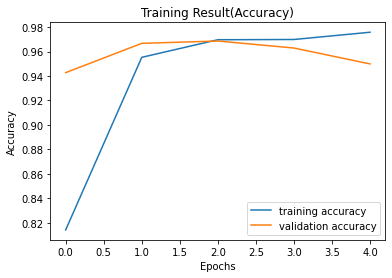

In [65]:
plt.figure()
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.title("Training Result(Accuracy)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('Training_result_acc.png')
plt.show()

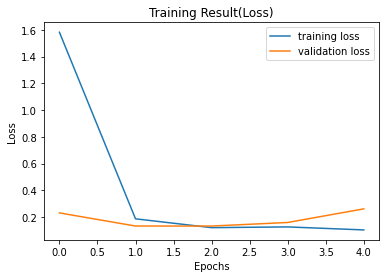

In [66]:
plt.figure()
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("Training Result(Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('Training_result_loss.png')
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)            

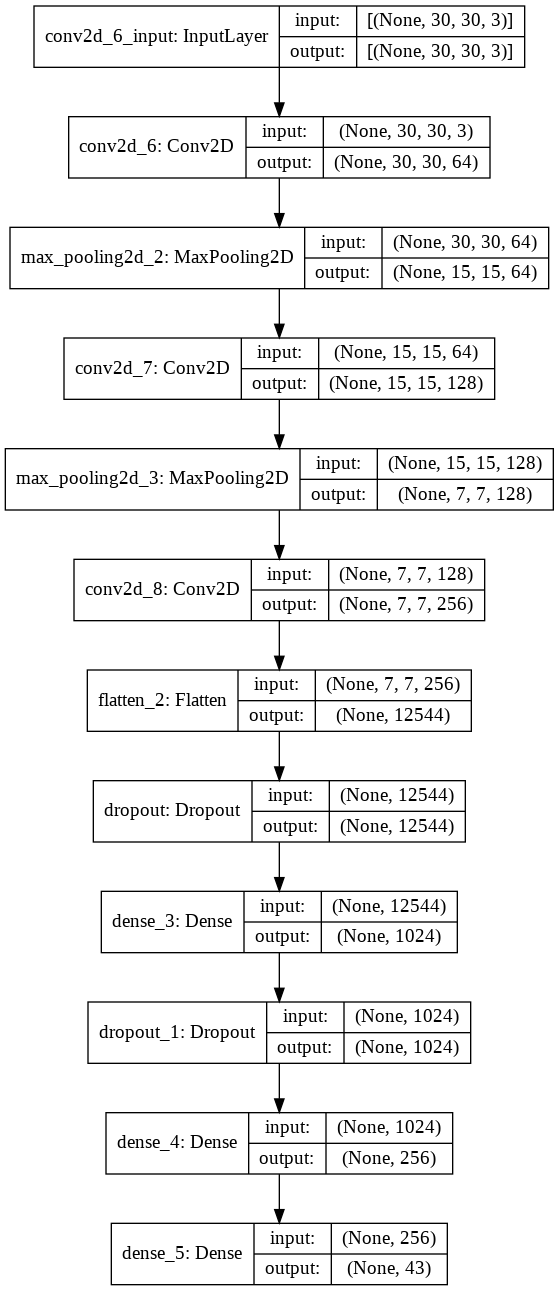

In [22]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:], padding='same'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(43, activation="softmax"))

model2.summary()
plot_model(model2, "model2.png", show_shapes=True)

In [93]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
epoch = 5
history = model2.fit(X_train, y_train, batch_size=32, epochs=epoch, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
981/981 [==============================] - 17s 17ms/step - loss: 1.2598 - accuracy: 0.7356 - val_loss: 0.3006 - val_accuracy: 0.9184
Epoch 2/5
981/981 [==============================] - 16s 16ms/step - loss: 0.2218 - accuracy: 0.9379 - val_loss: 0.3035 - val_accuracy: 0.9308
Epoch 3/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1692 - accuracy: 0.9551 - val_loss: 0.1660 - val_accuracy: 0.9570
Epoch 4/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1256 - accuracy: 0.9677 - val_loss: 0.1498 - val_accuracy: 0.9651
Epoch 5/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1217 - accuracy: 0.9704 - val_loss: 0.1200 - val_accuracy: 0.9726


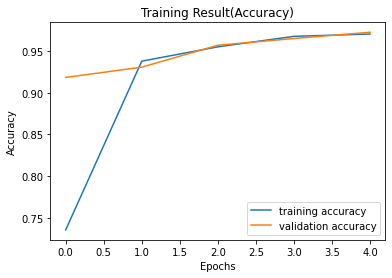

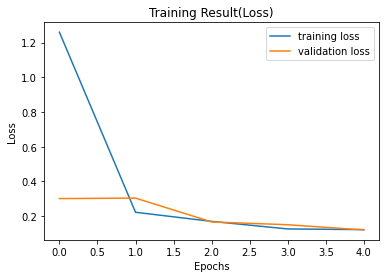

In [94]:
plt.figure()
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.title("Training Result(Accuracy)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('Training_result_acc.png')
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("Training Result(Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('Training_result_loss.png')
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)       295168    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 512)       1180160   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 256)        

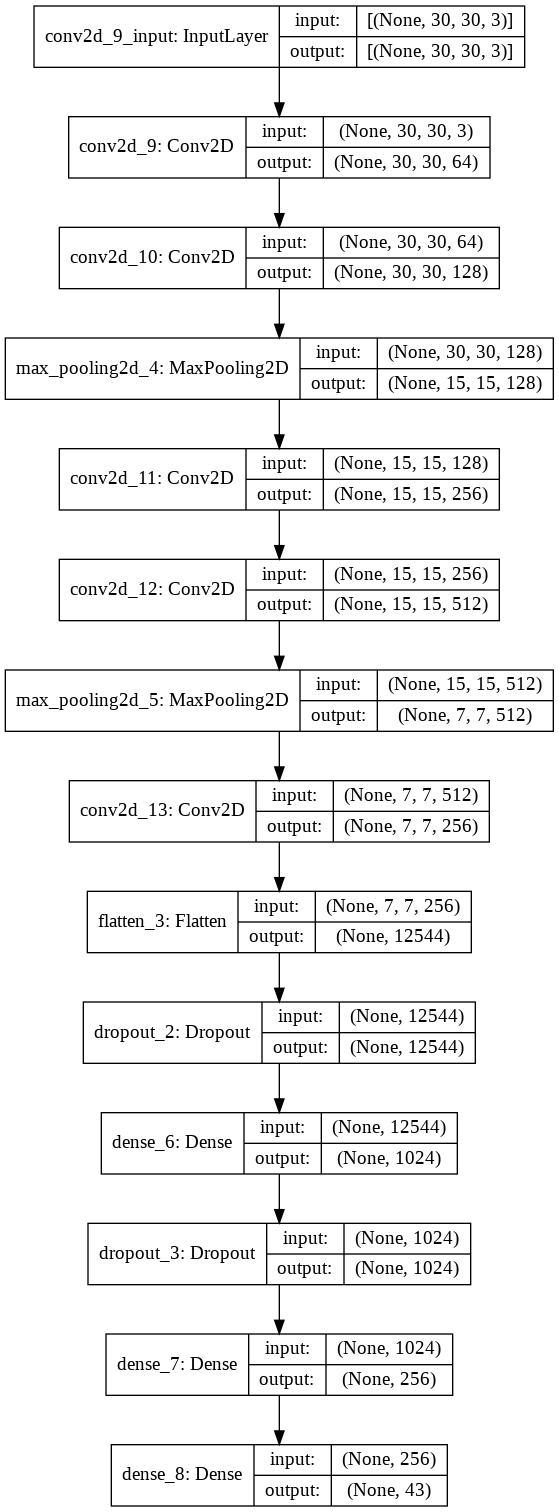

In [23]:
model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:], padding='same'))
model3.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=2))
model3.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=2))
model3.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(43, activation="softmax"))

model3.summary()
plot_model(model3, "model3.png", show_shapes=True)

In [86]:
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
epoch = 5
history = model3.fit(X_train, y_train, batch_size=32, epochs=epoch, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
981/981 [==============================] - 42s 42ms/step - loss: 1.5919 - accuracy: 0.5609 - val_loss: 0.2127 - val_accuracy: 0.9392
Epoch 2/5
981/981 [==============================] - 40s 41ms/step - loss: 0.2450 - accuracy: 0.9330 - val_loss: 0.1689 - val_accuracy: 0.9628
Epoch 3/5
981/981 [==============================] - 40s 41ms/step - loss: 0.1599 - accuracy: 0.9595 - val_loss: 0.0500 - val_accuracy: 0.9860
Epoch 4/5
981/981 [==============================] - 41s 41ms/step - loss: 0.1536 - accuracy: 0.9645 - val_loss: 0.0570 - val_accuracy: 0.9861
Epoch 5/5
981/981 [==============================] - 41s 41ms/step - loss: 0.1713 - accuracy: 0.9639 - val_loss: 0.0765 - val_accuracy: 0.9836


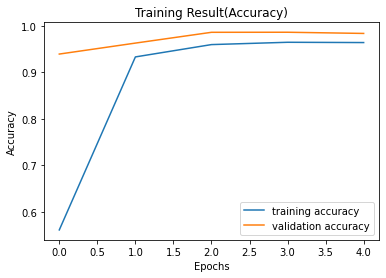

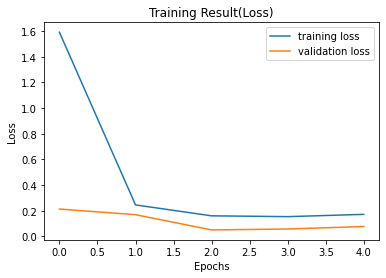

In [87]:
plt.figure()
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.title("Training Result(Accuracy)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('Training_result_acc.png')
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("Training Result(Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('Training_result_loss.png')
plt.show()

# Compile the model with loss and optimize function
[Losses on Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/losses)  
[reference for loss function](https://gombru.github.io/2018/05/23/cross_entropy_loss/)  
[Optimizers on Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)  
[Metrics on Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

# Train the model

# Save the Model

In [99]:
model3.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [100]:
!zip my__model.zip -r ./my_model

  adding: my_model/ (stored 0%)
  adding: my_model/keras_metadata.pb (deflated 93%)
  adding: my_model/saved_model.pb (deflated 89%)
  adding: my_model/assets/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.index (deflated 69%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 11%)


# Report
After completing your work on this notebook, please upload your report via ecampus.
The due date for submitting your report is 06/04.
* Your report is expected to include the following contents:
  * Problem statement
  * Proposed model
  * Experiments
  * Model performance evaluation
  * Discussion

* Following contents must be included in you submission file:
  * Report (word or hwp)
  * Trained Model (The name of the model must be "my_model")

* The submission file must be in .zip file 
* The submission file should be named as follows:
  * Project_A2021111.zip
